# LightGBM

## Baseline1

提取之前`data_processing`的数据，第一次进行`lgb mape`训练

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### 提取数据

In [2]:
A_data = pd.read_csv('../data/lgb_A.csv')
B_data = pd.read_csv('../data/lgb_B.csv')
C_data = pd.read_csv('../data/lgb_C.csv')

In [3]:
A_data

,Time,A_traffic,A_day_mean,A_day_std,A_day_max,A_day_min,A_day_median,A_day_sum,A_month_mean,A_month_std,A_month_max,A_month_min,A_month_median,A_month_sum
0,2017-01-01 00:00:00,3.900242,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
1,2017-01-01 01:00:00,2.520269,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
2,2017-01-01 02:00:00,1.489956,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
3,2017-01-01 03:00:00,0.896120,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
4,2017-01-01 04:00:00,0.608650,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
5,2017-01-01 05:00:00,0.552281,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
6,2017-01-01 06:00:00,0.799602,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
7,2017-01-01 07:00:00,1.492962,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
8,2017-01-01 08:00:00,2.319831,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951
9,2017-01-01 09:00:00,3.057129,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951


### 提取年月日离散值

In [4]:
def getch_date(A_data):
    time = A_data.Time
    year = []
    month = []
    day = []
    hour = []

    for i in range(0, len(time)):
        year.append(int(time[i].split('-')[0]))
        month.append(int(time[i].split('-')[1]))
        day.append(int(time[i].split('-')[2][:2]))
        hour.append(int(time[i].split(':')[0][-2:]))

#     A_data["Year"] = year
    A_data["Month"] = month
    A_data["Day"] = day
    A_data["Hour"] = hour
    
    return A_data
    
A_data = getch_date(A_data)
B_data = getch_date(B_data)
C_data = getch_date(C_data)    
    
A_data

,Time,A_traffic,A_day_mean,A_day_std,A_day_max,A_day_min,A_day_median,A_day_sum,A_month_mean,A_month_std,A_month_max,A_month_min,A_month_median,A_month_sum,Month,Day,Hour
0,2017-01-01 00:00:00,3.900242,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,0
1,2017-01-01 01:00:00,2.520269,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,1
2,2017-01-01 02:00:00,1.489956,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,2
3,2017-01-01 03:00:00,0.896120,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,3
4,2017-01-01 04:00:00,0.608650,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,4
5,2017-01-01 05:00:00,0.552281,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,5
6,2017-01-01 06:00:00,0.799602,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,6
7,2017-01-01 07:00:00,1.492962,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,7
8,2017-01-01 08:00:00,2.319831,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,8
9,2017-01-01 09:00:00,3.057129,2.967122,1.263365,4.609963,0.552281,3.698705,71.210922,2.458470,1.336300,5.719160,0.203809,2.484947,1740.596951,1,1,9


### 离散值one-hot处理

In [5]:
def data_normalization(data):
    data_normalization = []
    data_mean = np.mean(data)
    data_std = np.std(data)
    for i in range(0, len(data)):
        data_normalization.append((data[i] - data_mean) / data_std)
    return data_normalization

def one_hot_processing(one_hot_data, raw_data, key):
    for i in range(0, len(one_hot_data[0])):
        raw_data[key + "_" + str(i)] = one_hot_data[:,i]

def data_processing(A_data, city):
    
    raw_A_data = pd.DataFrame()

    raw_A_data["traffic"] = A_data[city + "_traffic"]

    label = preprocessing.LabelEncoder()
    one_hot = preprocessing.OneHotEncoder(sparse = False, categories='auto')
#     Year = one_hot.fit_transform(np.array(A_data.Year).reshape(-1, 1))
    Month = one_hot.fit_transform(np.array(A_data.Month).reshape(-1, 1))
    Day = one_hot.fit_transform(np.array(A_data.Day).reshape(-1, 1))
    Hour = one_hot.fit_transform(np.array(A_data.Hour).reshape(-1, 1))
    
#     one_hot_processing(Year, raw_A_data, "Year")
    one_hot_processing(Month, raw_A_data, "Month")
    one_hot_processing(Day, raw_A_data, "Day")
    one_hot_processing(Hour, raw_A_data, "Hour")

    return raw_A_data

raw_A_data = data_processing(A_data, "A")
raw_B_data = data_processing(B_data, "B")
raw_C_data = data_processing(C_data, "C")

# raw_A_data = pd.DataFrame({"traffic": A_data["A_traffic"],
#                           "Hour": A_data["Hour"],
#                           "Day": A_data["Day"],
#                           "Month": A_data["Month"],
#                           "Year": A_data["Year"]})

# raw_B_data = pd.DataFrame({"traffic": B_data["B_traffic"],
#                           "Hour": B_data["Hour"],
#                           "Day": B_data["Day"],
#                           "Month": B_data["Month"],
#                           "Year": B_data["Year"]})

# raw_C_data = pd.DataFrame({"traffic": C_data["C_traffic"],
#                           "Hour": C_data["Hour"],
#                           "Day": C_data["Day"],
#                           "Month": C_data["Month"],
#                           "Year": C_data["Year"]})


raw_A_data

,traffic,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,3.900242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.520269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.489956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.896120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.608650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.552281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.799602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.492962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.319831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.057129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 生成特征及数据标准化

In [6]:
# raw_A_data = raw_A_data.drop(["day_mean", "day_std", "day_max", "day_min", "day_median", 
#                               "day_sum", "month_mean", "month_std", "month_max", "month_min", 
#                               "month_median", "month_sum"], axis=1)
def feature_producing(raw_A_data):
    
    print("Features producing... ")
    
    year_mean = []
    year_max = []
    year_min = []
    year_std = []
    year_median = []
    year_sum = []
    half_year_mean = []
    half_year_max = []
    half_year_min = []
    half_year_std = []
    half_year_median = []
    half_year_sum = []
    season_mean = []
    season_max = []
    season_min = []
    season_std = []
    season_median = []
    season_sum = []
    month_mean = []
    month_max = []
    month_min = []
    month_std = []
    month_median = []
    month_sum = []
    week_mean = []
    week_max = []
    week_min = []
    week_std = []
    week_median = []
    week_sum = []
    day_mean = []
    day_max = []
    day_min = []
    day_std = []
    day_median = []
    day_sum = []
    hour = []

    year_temp = []
    half_year_temp = []
    season_temp = []
    month_temp = []
    week_temp = []
    day_temp = []
    hour_temp = []

    for i in range(0, len(raw_A_data)):
#         print(i)
        if i != 0 and np.isnan(raw_A_data.traffic[i-1]) != 1:
            
            year_temp.append(raw_A_data.traffic[i-1])
            half_year_temp.append(raw_A_data.traffic[i-1])
            season_temp.append(raw_A_data.traffic[i-1])
            month_temp.append(raw_A_data.traffic[i-1])
            week_temp.append(raw_A_data.traffic[i-1])
            day_temp.append(raw_A_data.traffic[i-1])
            hour_temp.append(raw_A_data.traffic[i-1])

        if i == 0:

            hour.append(raw_A_data.traffic[0])
            day_max.append(raw_A_data.traffic[0])
            week_max.append(raw_A_data.traffic[0])
            month_max.append(raw_A_data.traffic[0])
            season_max.append(raw_A_data.traffic[0])
            half_year_max.append(raw_A_data.traffic[0])
            year_max.append(raw_A_data.traffic[0])


            day_mean.append(raw_A_data.traffic[0])
            week_mean.append(raw_A_data.traffic[0])
            month_mean.append(raw_A_data.traffic[0])
            season_mean.append(raw_A_data.traffic[0])
            half_year_mean.append(raw_A_data.traffic[0])
            year_mean.append(raw_A_data.traffic[0])

            day_min.append(raw_A_data.traffic[0])
            week_min.append(raw_A_data.traffic[0])
            month_min.append(raw_A_data.traffic[0])
            season_min.append(raw_A_data.traffic[0])
            half_year_min.append(raw_A_data.traffic[0])
            year_min.append(raw_A_data.traffic[0])

            day_std.append(np.std(raw_A_data.traffic[0]))
            week_std.append(np.std(raw_A_data.traffic[0]))
            month_std.append(np.std(raw_A_data.traffic[0]))
            season_std.append(np.std(raw_A_data.traffic[0]))
            half_year_std.append(np.std(raw_A_data.traffic[0]))
            year_std.append(np.std(raw_A_data.traffic[0]))

            day_median.append(raw_A_data.traffic[0])
            week_median.append(raw_A_data.traffic[0])
            month_median.append(raw_A_data.traffic[0])
            season_median.append(raw_A_data.traffic[0])
            half_year_median.append(raw_A_data.traffic[0])
            year_median.append(raw_A_data.traffic[0])

            day_sum.append(raw_A_data.traffic[0])
            week_sum.append(raw_A_data.traffic[0])
            month_sum.append(raw_A_data.traffic[0])
            season_sum.append(raw_A_data.traffic[0])
            half_year_sum.append(raw_A_data.traffic[0])
            year_sum.append(raw_A_data.traffic[0])

        else:
            if np.isnan(raw_A_data.traffic[i-1]) != 1:
                hour.append(hour_temp[0])
            else:
                hour.append(raw_A_data.traffic[i-2])
            day_mean.append(np.mean(day_temp))
            week_mean.append(np.mean(week_temp))
            month_mean.append(np.mean(month_temp))
            season_mean.append(np.mean(season_temp))
            half_year_mean.append(np.mean(half_year_temp))
            year_mean.append(np.mean(year_temp))

            day_max.append(np.max(day_temp))
            week_max.append(np.max(week_temp))
            month_max.append(np.max(month_temp))
            season_max.append(np.max(season_temp))
            half_year_max.append(np.max(half_year_temp))
            year_max.append(np.max(year_temp))

            day_min.append(np.min(day_temp))
            week_min.append(np.min(week_temp))
            month_min.append(np.min(month_temp))
            season_min.append(np.min(season_temp))
            half_year_min.append(np.min(half_year_temp))
            year_min.append(np.min(year_temp))

            day_std.append(np.std(day_temp))
            week_std.append(np.std(week_temp))
            month_std.append(np.std(month_temp))
            season_std.append(np.std(season_temp))
            half_year_std.append(np.std(half_year_temp))
            year_std.append(np.std(year_temp))

            day_median.append(np.median(day_temp))
            week_median.append(np.median(week_temp))
            month_median.append(np.median(month_temp))
            season_median.append(np.median(season_temp))
            half_year_median.append(np.median(half_year_temp))
            year_median.append(np.median(year_temp))

            day_sum.append(np.sum(day_temp))
            week_sum.append(np.sum(week_temp))
            month_sum.append(np.sum(month_temp))
            season_sum.append(np.sum(season_temp))
            half_year_sum.append(np.sum(half_year_temp))
            year_sum.append(np.sum(year_temp))

        if len(hour_temp) == 1:
            hour_temp.pop()
        if len(day_temp) == 24:
            day_temp.pop()
        if len(week_temp) == 24 * 7:
            week_temp.pop()
        if len(month_temp) == 24 * 7 * 30:
            day_temp.pop()
        if len(season_temp) == 24 * 7 * 30 * 3:
            season_temp.pop()
        if len(half_year_temp) == 24 * 7 * 30 * 6:
            half_year_temp.pop()
        if len(year_temp) == 24 * 7 * 30 * 12:
            year_temp.pop()


#     raw_A_data["year_mean"] = data_normalization(year_mean)
#     raw_A_data["year_max"] = data_normalization(year_max)
#     raw_A_data["year_min"] = data_normalization(year_min)
#     raw_A_data["year_std"] = data_normalization(year_std)
#     raw_A_data["year_median"] = data_normalization(year_median)
#     raw_A_data["year_sum"] = data_normalization(year_sum)
#     raw_A_data["half_year_mean"] = data_normalization(half_year_mean)
#     raw_A_data["half_year_max"] = data_normalization(half_year_max)
#     raw_A_data["half_year_min"] = data_normalization(half_year_min)
#     raw_A_data["half_year_std"] = data_normalization(half_year_std)
#     raw_A_data["half_year_median"] = data_normalization(half_year_median)
#     raw_A_data["half_year_sum"] = data_normalization(half_year_sum)
#     raw_A_data["season_mean"] = data_normalization(season_mean)
#     raw_A_data["season_max"] = data_normalization(season_max)
#     raw_A_data["season_min"] = data_normalization(season_min)
#     raw_A_data["season_std"] = data_normalization(season_std)
#     raw_A_data["season_median"] = data_normalization(season_median)
#     raw_A_data["season_sum"] = data_normalization(season_sum)
#     raw_A_data["month_mean"] = data_normalization(month_mean)
#     raw_A_data["month_max"] = data_normalization(month_max)
#     raw_A_data["month_min"] = data_normalization(month_min)
#     raw_A_data["month_std"] = data_normalization(month_std)
#     raw_A_data["month_median"] = data_normalization(month_median)
#     raw_A_data["month_sum"] = data_normalization(month_sum)
#     raw_A_data["week_mean"] = data_normalization(week_mean)
#     raw_A_data["week_max"] = data_normalization(week_max)
#     raw_A_data["week_min"] = data_normalization(week_min)
#     raw_A_data["week_std"] = data_normalization(week_std)
#     raw_A_data["week_median"] = data_normalization(week_median)
#     raw_A_data["week_sum"] = data_normalization(week_sum)
#     raw_A_data["day_mean"] = data_normalization(day_mean)
#     raw_A_data["day_max"] = data_normalization(day_max)
#     raw_A_data["day_min"] = data_normalization(day_min)
#     raw_A_data["day_std"] = data_normalization(day_std)
#     raw_A_data["day_median"] = data_normalization(day_median)
#     raw_A_data["day_sum"] = data_normalization(day_sum)

    raw_A_data["year_mean"] = year_mean
    raw_A_data["year_max"] = year_max
    raw_A_data["year_min"] = year_min
    raw_A_data["year_std"] = year_std
    raw_A_data["year_median"] = year_median
    raw_A_data["year_sum"] = year_sum
    raw_A_data["half_year_mean"] = half_year_mean
    raw_A_data["half_year_max"] = half_year_max
    raw_A_data["half_year_min"] = half_year_min
    raw_A_data["half_year_std"] = half_year_std
    raw_A_data["half_year_median"] = half_year_median
    raw_A_data["half_year_sum"] = half_year_sum
    raw_A_data["season_mean"] = season_mean
    raw_A_data["season_max"] = season_max
    raw_A_data["season_min"] = season_min
    raw_A_data["season_std"] = season_std
    raw_A_data["season_median"] = season_median
    raw_A_data["season_sum"] = season_sum
    raw_A_data["month_mean"] = month_mean
    raw_A_data["month_max"] = month_max
    raw_A_data["month_min"] = month_min
    raw_A_data["month_std"] = month_std
    raw_A_data["month_median"] = month_median
    raw_A_data["month_sum"] = month_sum
    raw_A_data["week_mean"] = week_mean
    raw_A_data["week_max"] = week_max
    raw_A_data["week_min"] = week_min
    raw_A_data["week_std"] = week_std
    raw_A_data["week_median"] = week_median
    raw_A_data["week_sum"] = week_sum
    raw_A_data["day_mean"] = day_mean
    raw_A_data["day_max"] = day_max
    raw_A_data["day_min"] = day_min
    raw_A_data["day_std"] = day_std
    raw_A_data["day_median"] = day_median
    raw_A_data["day_sum"] = day_sum
    raw_A_data["hour"] = hour
    
    return raw_A_data

raw_A_data = feature_producing(raw_A_data)
raw_B_data = feature_producing(raw_B_data)
raw_C_data = feature_producing(raw_C_data)

raw_A_data

Features producing... 
Features producing... 
Features producing... 


,traffic,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,...,week_std,week_median,week_sum,day_mean,day_max,day_min,day_std,day_median,day_sum,hour
0,3.900242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.900242,3.900242,3.900242,3.900242,3.900242,0.000000,3.900242,3.900242,3.900242
1,2.520269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.900242,3.900242,3.900242,3.900242,3.900242,0.000000,3.900242,3.900242,3.900242
2,1.489956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.689987,3.210255,6.420510,3.210255,3.900242,2.520269,0.689987,3.210255,6.420510,2.520269
3,0.896120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.987440,2.520269,7.910467,2.636822,3.900242,1.489956,0.987440,2.520269,7.910467,1.489956
4,0.608650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.139918,2.005112,8.806587,2.201647,3.900242,0.896120,1.139918,2.005112,8.806587,0.896120
5,0.552281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.202311,1.489956,9.415236,1.883047,3.900242,0.608650,1.202311,1.489956,9.415236,0.608650
6,0.799602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.204405,1.193038,9.967517,1.661253,3.900242,0.552281,1.204405,1.193038,9.967517,0.552281
7,1.492962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.155108,0.896120,10.767120,1.538160,3.900242,0.552281,1.155108,0.896120,10.767120,0.799602
8,2.319831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.080608,1.193038,12.260082,1.532510,3.900242,0.552281,1.080608,1.193038,12.260082,1.492962
9,3.057129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.048422,1.489956,14.579913,1.619990,3.900242,0.552281,1.048422,1.489956,14.579913,2.319831


### 去除空值

考虑使用就近填充会造成完全的特征重复，导致连续两时刻出现相同流量，这里采取删除策略

In [7]:
raw_A_data = raw_A_data.drop(raw_A_data[raw_A_data.isnull().values==True].index)
raw_B_data = raw_B_data.drop(raw_B_data[raw_B_data.isnull().values==True].index)
raw_C_data = raw_C_data.drop(raw_C_data[raw_C_data.isnull().values==True].index)
print(len(raw_A_data), len(raw_B_data), len(raw_C_data))

16383 16385 16365


### 训练测试集分割

In [8]:
train_size = int(0.8 * len(raw_A_data))

def train_test_split(raw_A_data, train_size):
    A_features = raw_A_data.drop(["traffic"], axis=1)
    A_labels = raw_A_data.traffic

    x_A_train = A_features[:train_size]
    y_A_train = A_labels[:train_size]
    x_A_test = A_features[train_size:]
    y_A_test = A_labels[train_size:]
    
    return x_A_train, y_A_train, x_A_test, y_A_test

x_A_train, y_A_train, x_A_test, y_A_test = train_test_split(raw_A_data, train_size)
x_B_train, y_B_train, x_B_test, y_B_test = train_test_split(raw_B_data, train_size)
x_C_train, y_C_train, x_C_test, y_C_test = train_test_split(raw_C_data, train_size)

x_A_train

,Month_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,week_std,week_median,week_sum,day_mean,day_max,day_min,day_std,day_median,day_sum,hour
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.900242,3.900242,3.900242,3.900242,3.900242,0.000000,3.900242,3.900242,3.900242
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.900242,3.900242,3.900242,3.900242,3.900242,0.000000,3.900242,3.900242,3.900242
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.689987,3.210255,6.420510,3.210255,3.900242,2.520269,0.689987,3.210255,6.420510,2.520269
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.987440,2.520269,7.910467,2.636822,3.900242,1.489956,0.987440,2.520269,7.910467,1.489956
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.139918,2.005112,8.806587,2.201647,3.900242,0.896120,1.139918,2.005112,8.806587,0.896120
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.202311,1.489956,9.415236,1.883047,3.900242,0.608650,1.202311,1.489956,9.415236,0.608650
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.204405,1.193038,9.967517,1.661253,3.900242,0.552281,1.204405,1.193038,9.967517,0.552281
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.155108,0.896120,10.767120,1.538160,3.900242,0.552281,1.155108,0.896120,10.767120,0.799602
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.080608,1.193038,12.260082,1.532510,3.900242,0.552281,1.080608,1.193038,12.260082,1.492962
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.048422,1.489956,14.579913,1.619990,3.900242,0.552281,1.048422,1.489956,14.579913,2.319831


### K折交叉验证

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def kfold_lightgbm(train_df, test_df, y, num_folds, city, stratified = False, debug= False):
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=17)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=17)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = train_df.columns.tolist()
    test_df = test_df[feats]
    #test_df = csr_matrix(test_df)
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, y)):
        print('FOLD {}'.format(n_fold))
        train_x, train_y = train_df.iloc[train_idx], y.iloc[train_idx]
        valid_x, valid_y = train_df.iloc[valid_idx], y.iloc[valid_idx]
 
        # LightGBM parameters found by Bayesian optimization
        
        lgb_params =  {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': 'mape',
            'metric': 'mape',
            #"n_estimators":10000,
            "learning_rate": 0.01,

            'num_leaves': 60,
            'subsample': 0.6143,
            'colsample_bytree': 0.6453,
            'min_split_gain': np.power(10, -2.5988),
            'reg_alpha': np.power(10, -2.2887),
            'reg_lambda': np.power(10, 1.7570),
            'min_child_weight': np.power(10, -0.1477),
            'max_depth': -1,
            #'zero_as_missing':True
        }
        
        '''
        lgb_params = {
            'objective': 'regression',
            'metric': 'rmse',
            'learning_rate': 0.01,
            'num_leaves': 16,
            'max_depth': -1,
            'min_child_samples': 1,
            'max_bin': 300,
            'subsample': 1.0,
            'subsample_freq': 1,
            'colsample_bytree': 0.5,
            'min_child_weight': 10,
            'reg_lambda': 0.1,
            'reg_alpha': 0.0,
            'scale_pos_weight': 1,
            'zero_as_missing': True,
            'num_threads': -1,
        }
        
        lgb_params = {   
            'task': 'train',
            'boosting_type': 'gbdt', 
            'objective': 'mape',
            'metric': 'mape',
            'learning_rate': 0.01, 
            'num_leaves': 68, 
            'max_depth': 7,                
            'subsample': 0.8, 
            'colsample_bytree': 0.8, 
            'min_child_samples': 20, 
            'min_child_weight': 0.001,
            'bagging_fraction': 1.0, 
            'feature_fraction': 0.7
        }
        '''
        
        lgtrain = lgb.Dataset(train_x, train_y,
                        feature_name=feats) #categorical_feature = 'auto'
        lgvalid = lgb.Dataset(valid_x, valid_y,
                        feature_name=feats)
        clf = lgb.train(
            lgb_params,
            lgtrain,
            num_boost_round=50000,
            valid_sets=[lgtrain, lgvalid],
            valid_names=['train','valid'],
            early_stopping_rounds=500,
            verbose_eval=100
        )
        
         
       # clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            #eval_metric= 'auc', verbose= 100, early_stopping_rounds= 200)
 
        #oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        #sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
         
        oof_preds[valid_idx] = clf.predict(valid_x, num_iteration=clf.best_iteration)
        sub_preds += clf.predict(test_df, num_iteration=clf.best_iteration)/ folds.n_splits
        clf.save_model("../model/lgb_"+ city + "_fold_" + str(n_fold) + ".txt")
         
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importance()

        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        #print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        print('Fold %2d MAPE : %.6f' % (n_fold, mean_absolute_percentage_error(valid_y, oof_preds[valid_idx])))      
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()
 
    mape = mean_absolute_percentage_error(y, oof_preds)
    #print('Full AUC score %.6f' % roc_auc_score(y, oof_preds))
    print('Full MAPE score %.6f' % mape)
     
    display_importances(feature_importance_df, city)
    return feature_importance_df, sub_preds

# 显示特征对于训练的重要性
def display_importances(feature_importance_df_, city):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig("../images/lgb_" + city + "_importances.png")

FOLD 0
Training until validation scores don't improve for 500 rounds.
[100]	train's mape: 0.272147	valid's mape: 0.271609
[200]	train's mape: 0.132614	valid's mape: 0.132363
[300]	train's mape: 0.0829671	valid's mape: 0.08356
[400]	train's mape: 0.062394	valid's mape: 0.0631313
[500]	train's mape: 0.0532198	valid's mape: 0.0544282
[600]	train's mape: 0.0486772	valid's mape: 0.0503214
[700]	train's mape: 0.0455906	valid's mape: 0.0475773
[800]	train's mape: 0.0438267	valid's mape: 0.0460596
[900]	train's mape: 0.0426911	valid's mape: 0.0450884
[1000]	train's mape: 0.0417758	valid's mape: 0.0443333
[1100]	train's mape: 0.0410504	valid's mape: 0.0438009
[1200]	train's mape: 0.0403099	valid's mape: 0.0432533
[1300]	train's mape: 0.0397433	valid's mape: 0.0428593
[1400]	train's mape: 0.0393465	valid's mape: 0.0425858
[1500]	train's mape: 0.0389056	valid's mape: 0.0423069
[1600]	train's mape: 0.0385911	valid's mape: 0.0421392
[1700]	train's mape: 0.0382609	valid's mape: 0.04194
[1800]	train'

[14900]	train's mape: 0.0310206	valid's mape: 0.0386661
[15000]	train's mape: 0.0310068	valid's mape: 0.038662
[15100]	train's mape: 0.030994	valid's mape: 0.0386568
[15200]	train's mape: 0.0309842	valid's mape: 0.0386534
[15300]	train's mape: 0.0309695	valid's mape: 0.0386481
[15400]	train's mape: 0.0309565	valid's mape: 0.0386389
[15500]	train's mape: 0.0309485	valid's mape: 0.0386411
[15600]	train's mape: 0.0309406	valid's mape: 0.0386407
[15700]	train's mape: 0.0309284	valid's mape: 0.0386385
[15800]	train's mape: 0.0309193	valid's mape: 0.0386356
[15900]	train's mape: 0.0309111	valid's mape: 0.0386347
[16000]	train's mape: 0.0309033	valid's mape: 0.0386353
[16100]	train's mape: 0.0308901	valid's mape: 0.0386278
[16200]	train's mape: 0.0308653	valid's mape: 0.038619
[16300]	train's mape: 0.030855	valid's mape: 0.0386136
[16400]	train's mape: 0.0308454	valid's mape: 0.0386103
[16500]	train's mape: 0.0308329	valid's mape: 0.0386046
[16600]	train's mape: 0.0308201	valid's mape: 0.0386

[29600]	train's mape: 0.029897	valid's mape: 0.0382427
[29700]	train's mape: 0.0298949	valid's mape: 0.03824
[29800]	train's mape: 0.0298902	valid's mape: 0.0382384
[29900]	train's mape: 0.0298859	valid's mape: 0.0382358
[30000]	train's mape: 0.029882	valid's mape: 0.0382335
[30100]	train's mape: 0.0298779	valid's mape: 0.0382322
[30200]	train's mape: 0.0298725	valid's mape: 0.0382284
[30300]	train's mape: 0.0298694	valid's mape: 0.0382279
[30400]	train's mape: 0.0298663	valid's mape: 0.0382279
[30500]	train's mape: 0.0298605	valid's mape: 0.0382264
[30600]	train's mape: 0.0298564	valid's mape: 0.0382261
[30700]	train's mape: 0.0298471	valid's mape: 0.0382222
[30800]	train's mape: 0.0298398	valid's mape: 0.0382201
[30900]	train's mape: 0.0298293	valid's mape: 0.0382175
[31000]	train's mape: 0.0298199	valid's mape: 0.0382206
[31100]	train's mape: 0.0298097	valid's mape: 0.0382205
[31200]	train's mape: 0.0298072	valid's mape: 0.038221
[31300]	train's mape: 0.029802	valid's mape: 0.038216

[44400]	train's mape: 0.0292729	valid's mape: 0.0380661
[44500]	train's mape: 0.0292707	valid's mape: 0.0380676
Early stopping, best iteration is:
[44011]	train's mape: 0.0292813	valid's mape: 0.0380652
Fold  0 MAPE : 4.023558
FOLD 1
Training until validation scores don't improve for 500 rounds.
[100]	train's mape: 0.2728	valid's mape: 0.275243
[200]	train's mape: 0.132829	valid's mape: 0.137385
[300]	train's mape: 0.0831678	valid's mape: 0.0885394
[400]	train's mape: 0.0625555	valid's mape: 0.0680342
[500]	train's mape: 0.0532341	valid's mape: 0.0587602
[600]	train's mape: 0.0482736	valid's mape: 0.0539655
[700]	train's mape: 0.0451102	valid's mape: 0.0508487
[800]	train's mape: 0.0434266	valid's mape: 0.0492167
[900]	train's mape: 0.042243	valid's mape: 0.0480962
[1000]	train's mape: 0.0414308	valid's mape: 0.047405
[1100]	train's mape: 0.040666	valid's mape: 0.0467763
[1200]	train's mape: 0.0399446	valid's mape: 0.0461726
[1300]	train's mape: 0.0394526	valid's mape: 0.0457637
[1400]

[14500]	train's mape: 0.0313062	valid's mape: 0.0413061
[14600]	train's mape: 0.0312924	valid's mape: 0.0412984
[14700]	train's mape: 0.0312857	valid's mape: 0.0412977
[14800]	train's mape: 0.0312764	valid's mape: 0.0412943
[14900]	train's mape: 0.031269	valid's mape: 0.0412928
[15000]	train's mape: 0.031262	valid's mape: 0.041292
[15100]	train's mape: 0.0312559	valid's mape: 0.0412886
[15200]	train's mape: 0.0312401	valid's mape: 0.0412753
[15300]	train's mape: 0.0312314	valid's mape: 0.0412708
[15400]	train's mape: 0.0312205	valid's mape: 0.0412661
[15500]	train's mape: 0.031214	valid's mape: 0.0412638
[15600]	train's mape: 0.0312009	valid's mape: 0.0412591
[15700]	train's mape: 0.0311905	valid's mape: 0.041256
[15800]	train's mape: 0.0311834	valid's mape: 0.0412523
[15900]	train's mape: 0.0311737	valid's mape: 0.0412461
[16000]	train's mape: 0.0311626	valid's mape: 0.0412435
[16100]	train's mape: 0.031153	valid's mape: 0.0412387
[16200]	train's mape: 0.0311377	valid's mape: 0.041229

[29200]	train's mape: 0.0299442	valid's mape: 0.0405434
[29300]	train's mape: 0.029941	valid's mape: 0.0405437
[29400]	train's mape: 0.0299343	valid's mape: 0.0405396
[29500]	train's mape: 0.0299312	valid's mape: 0.0405383
[29600]	train's mape: 0.0299261	valid's mape: 0.0405362
[29700]	train's mape: 0.0299223	valid's mape: 0.0405352
[29800]	train's mape: 0.0299216	valid's mape: 0.0405352
[29900]	train's mape: 0.0299169	valid's mape: 0.040535
[30000]	train's mape: 0.0299127	valid's mape: 0.0405334
[30100]	train's mape: 0.0299075	valid's mape: 0.0405319
[30200]	train's mape: 0.0299054	valid's mape: 0.0405303
[30300]	train's mape: 0.0299052	valid's mape: 0.0405305
[30400]	train's mape: 0.0299084	valid's mape: 0.0405355
[30500]	train's mape: 0.0298992	valid's mape: 0.0405278
[30600]	train's mape: 0.0298955	valid's mape: 0.0405262
[30700]	train's mape: 0.0298906	valid's mape: 0.0405254
[30800]	train's mape: 0.029886	valid's mape: 0.0405225
[30900]	train's mape: 0.0298818	valid's mape: 0.040

[2100]	train's mape: 0.0373089	valid's mape: 0.0410741
[2200]	train's mape: 0.0371278	valid's mape: 0.040985
[2300]	train's mape: 0.0368575	valid's mape: 0.0408452
[2400]	train's mape: 0.0366929	valid's mape: 0.0407795
[2500]	train's mape: 0.0365633	valid's mape: 0.0407247
[2600]	train's mape: 0.0364501	valid's mape: 0.0406742
[2700]	train's mape: 0.0363269	valid's mape: 0.0406148
[2800]	train's mape: 0.0362265	valid's mape: 0.0405748
[2900]	train's mape: 0.0361149	valid's mape: 0.0405278
[3000]	train's mape: 0.0360206	valid's mape: 0.0404709
[3100]	train's mape: 0.0359118	valid's mape: 0.0404262
[3200]	train's mape: 0.0357768	valid's mape: 0.0403593
[3300]	train's mape: 0.0356906	valid's mape: 0.0403207
[3400]	train's mape: 0.0356177	valid's mape: 0.0402932
[3500]	train's mape: 0.0355363	valid's mape: 0.0402513
[3600]	train's mape: 0.035452	valid's mape: 0.0402081
[3700]	train's mape: 0.0353767	valid's mape: 0.0401816
[3800]	train's mape: 0.0353018	valid's mape: 0.0401503
[3900]	train

[17000]	train's mape: 0.0311792	valid's mape: 0.0383494
[17100]	train's mape: 0.0311678	valid's mape: 0.0383459
[17200]	train's mape: 0.0311532	valid's mape: 0.038339
[17300]	train's mape: 0.031133	valid's mape: 0.0383265
[17400]	train's mape: 0.0311234	valid's mape: 0.0383175
[17500]	train's mape: 0.0311095	valid's mape: 0.0383086
[17600]	train's mape: 0.0311019	valid's mape: 0.0383077
[17700]	train's mape: 0.0310935	valid's mape: 0.0383069
[17800]	train's mape: 0.0310852	valid's mape: 0.0383085
[17900]	train's mape: 0.0310773	valid's mape: 0.0383081
[18000]	train's mape: 0.0310696	valid's mape: 0.0383056
[18100]	train's mape: 0.0310626	valid's mape: 0.0383042
[18200]	train's mape: 0.0310551	valid's mape: 0.0383053
[18300]	train's mape: 0.0310453	valid's mape: 0.0383007
[18400]	train's mape: 0.0310269	valid's mape: 0.0383
[18500]	train's mape: 0.0310212	valid's mape: 0.0383
[18600]	train's mape: 0.031011	valid's mape: 0.0382943
[18700]	train's mape: 0.0310004	valid's mape: 0.0382875
[

[31700]	train's mape: 0.030083	valid's mape: 0.0379067
[31800]	train's mape: 0.0300795	valid's mape: 0.0379051
[31900]	train's mape: 0.0300743	valid's mape: 0.0379028
[32000]	train's mape: 0.0300698	valid's mape: 0.0378962
[32100]	train's mape: 0.0300593	valid's mape: 0.0378922
[32200]	train's mape: 0.0300509	valid's mape: 0.0378868
[32300]	train's mape: 0.0300445	valid's mape: 0.0378861
[32400]	train's mape: 0.0300404	valid's mape: 0.0378854
[32500]	train's mape: 0.0300344	valid's mape: 0.0378812
[32600]	train's mape: 0.0300298	valid's mape: 0.0378795
[32700]	train's mape: 0.0300258	valid's mape: 0.0378786
[32800]	train's mape: 0.0300242	valid's mape: 0.0378798
[32900]	train's mape: 0.0300219	valid's mape: 0.0378797
[33000]	train's mape: 0.030018	valid's mape: 0.0378777
[33100]	train's mape: 0.0300123	valid's mape: 0.0378758
[33200]	train's mape: 0.0300107	valid's mape: 0.0378738
[33300]	train's mape: 0.0300083	valid's mape: 0.0378749
[33400]	train's mape: 0.0299991	valid's mape: 0.03

[46400]	train's mape: 0.0292467	valid's mape: 0.0375457
[46500]	train's mape: 0.0292424	valid's mape: 0.0375455
[46600]	train's mape: 0.0292389	valid's mape: 0.0375418
[46700]	train's mape: 0.0292371	valid's mape: 0.037539
[46800]	train's mape: 0.0292329	valid's mape: 0.0375371
[46900]	train's mape: 0.0292317	valid's mape: 0.0375383
[47000]	train's mape: 0.029229	valid's mape: 0.0375386
[47100]	train's mape: 0.0292222	valid's mape: 0.0375345
[47200]	train's mape: 0.0292162	valid's mape: 0.0375335
[47300]	train's mape: 0.0292138	valid's mape: 0.0375348
[47400]	train's mape: 0.0292168	valid's mape: 0.0375354
[47500]	train's mape: 0.0292076	valid's mape: 0.0375299
[47600]	train's mape: 0.0292008	valid's mape: 0.0375259
[47700]	train's mape: 0.0291935	valid's mape: 0.0375243
[47800]	train's mape: 0.0291874	valid's mape: 0.0375216
[47900]	train's mape: 0.0291831	valid's mape: 0.0375192
[48000]	train's mape: 0.0291797	valid's mape: 0.0375193
[48100]	train's mape: 0.0291721	valid's mape: 0.03

[11000]	train's mape: 0.0305774	valid's mape: 0.048511
[11100]	train's mape: 0.0305618	valid's mape: 0.0485078
[11200]	train's mape: 0.0305495	valid's mape: 0.0485055
[11300]	train's mape: 0.0305304	valid's mape: 0.0484952
[11400]	train's mape: 0.0304921	valid's mape: 0.0484672
[11500]	train's mape: 0.0304756	valid's mape: 0.0484616
[11600]	train's mape: 0.0304451	valid's mape: 0.0484381
[11700]	train's mape: 0.0304243	valid's mape: 0.0484243
[11800]	train's mape: 0.03041	valid's mape: 0.0484185
[11900]	train's mape: 0.0303942	valid's mape: 0.0484126
[12000]	train's mape: 0.030384	valid's mape: 0.0484117
[12100]	train's mape: 0.0303729	valid's mape: 0.0484052
[12200]	train's mape: 0.0303607	valid's mape: 0.0484025
[12300]	train's mape: 0.0303448	valid's mape: 0.048399
[12400]	train's mape: 0.0303105	valid's mape: 0.0483665
[12500]	train's mape: 0.0302997	valid's mape: 0.0483639
[12600]	train's mape: 0.0302804	valid's mape: 0.0483567
[12700]	train's mape: 0.0302626	valid's mape: 0.04834

[25700]	train's mape: 0.0290339	valid's mape: 0.0476669
[25800]	train's mape: 0.0290304	valid's mape: 0.0476644
[25900]	train's mape: 0.0290266	valid's mape: 0.047664
[26000]	train's mape: 0.0290169	valid's mape: 0.0476585
[26100]	train's mape: 0.029014	valid's mape: 0.0476583
[26200]	train's mape: 0.0290096	valid's mape: 0.0476584
[26300]	train's mape: 0.0290037	valid's mape: 0.0476556
[26400]	train's mape: 0.0289994	valid's mape: 0.0476547
[26500]	train's mape: 0.0289954	valid's mape: 0.0476532
[26600]	train's mape: 0.0289895	valid's mape: 0.0476499
[26700]	train's mape: 0.0289865	valid's mape: 0.0476492
[26800]	train's mape: 0.0289833	valid's mape: 0.0476461
[26900]	train's mape: 0.0289781	valid's mape: 0.047644
[27000]	train's mape: 0.0289729	valid's mape: 0.0476398
[27100]	train's mape: 0.0289678	valid's mape: 0.0476343
[27200]	train's mape: 0.0289587	valid's mape: 0.0476315
[27300]	train's mape: 0.0289546	valid's mape: 0.0476287
[27400]	train's mape: 0.0289503	valid's mape: 0.047

[40400]	train's mape: 0.0282469	valid's mape: 0.0473066
[40500]	train's mape: 0.0282431	valid's mape: 0.0473068
[40600]	train's mape: 0.0282382	valid's mape: 0.0472993
[40700]	train's mape: 0.0282361	valid's mape: 0.0472987
[40800]	train's mape: 0.0282318	valid's mape: 0.0472958
[40900]	train's mape: 0.0282303	valid's mape: 0.0472967
[41000]	train's mape: 0.028229	valid's mape: 0.0472973
[41100]	train's mape: 0.0282273	valid's mape: 0.0472957
[41200]	train's mape: 0.028224	valid's mape: 0.047295
[41300]	train's mape: 0.0282214	valid's mape: 0.0472947
[41400]	train's mape: 0.028218	valid's mape: 0.0472933
[41500]	train's mape: 0.0282155	valid's mape: 0.0472921
[41600]	train's mape: 0.0282134	valid's mape: 0.0472937
[41700]	train's mape: 0.02821	valid's mape: 0.0472924
[41800]	train's mape: 0.0282067	valid's mape: 0.0472952
[41900]	train's mape: 0.0281825	valid's mape: 0.0472673
[42000]	train's mape: 0.0281789	valid's mape: 0.0472647
[42100]	train's mape: 0.0281645	valid's mape: 0.047254

[4900]	train's mape: 0.0330689	valid's mape: 0.0441962
[5000]	train's mape: 0.033025	valid's mape: 0.0441873
[5100]	train's mape: 0.0329787	valid's mape: 0.0441753
[5200]	train's mape: 0.0329393	valid's mape: 0.0441573
[5300]	train's mape: 0.032898	valid's mape: 0.0441456
[5400]	train's mape: 0.0328685	valid's mape: 0.0441388
[5500]	train's mape: 0.032833	valid's mape: 0.0441355
[5600]	train's mape: 0.0328049	valid's mape: 0.0441309
[5700]	train's mape: 0.0327683	valid's mape: 0.0441222
[5800]	train's mape: 0.0327319	valid's mape: 0.044108
[5900]	train's mape: 0.0326929	valid's mape: 0.0441044
[6000]	train's mape: 0.0326372	valid's mape: 0.0440959
[6100]	train's mape: 0.0325817	valid's mape: 0.044071
[6200]	train's mape: 0.0325355	valid's mape: 0.0440575
[6300]	train's mape: 0.0324676	valid's mape: 0.0440562
[6400]	train's mape: 0.0324294	valid's mape: 0.0440562
[6500]	train's mape: 0.0324074	valid's mape: 0.0440532
[6600]	train's mape: 0.0323668	valid's mape: 0.0440392
[6700]	train's 

[19700]	train's mape: 0.0300708	valid's mape: 0.043359
[19800]	train's mape: 0.0300636	valid's mape: 0.0433562
[19900]	train's mape: 0.0300513	valid's mape: 0.0433487
[20000]	train's mape: 0.0300419	valid's mape: 0.0433452
[20100]	train's mape: 0.0300336	valid's mape: 0.043344
[20200]	train's mape: 0.0300311	valid's mape: 0.0433401
[20300]	train's mape: 0.0300247	valid's mape: 0.0433396
[20400]	train's mape: 0.0300192	valid's mape: 0.0433358
[20500]	train's mape: 0.0300136	valid's mape: 0.0433363
[20600]	train's mape: 0.0300082	valid's mape: 0.0433358
[20700]	train's mape: 0.0300007	valid's mape: 0.0433339
[20800]	train's mape: 0.0299947	valid's mape: 0.0433341
[20900]	train's mape: 0.0299891	valid's mape: 0.0433336
[21000]	train's mape: 0.0299836	valid's mape: 0.0433318
[21100]	train's mape: 0.0299742	valid's mape: 0.0433277
[21200]	train's mape: 0.0299688	valid's mape: 0.0433281
[21300]	train's mape: 0.0299622	valid's mape: 0.0433286
[21400]	train's mape: 0.0299553	valid's mape: 0.04

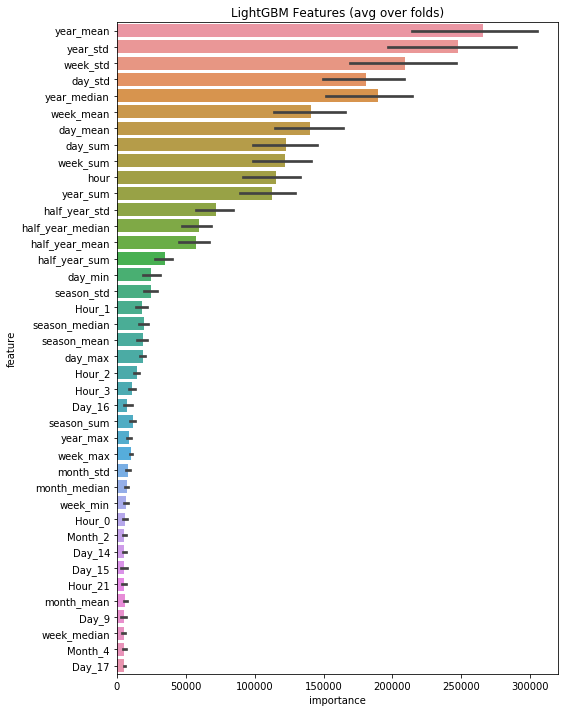

In [10]:
num_folds = 5

A_feature_importance, A_test_pred = kfold_lightgbm(x_A_train, x_A_test, y_A_train, num_folds, city="A")

FOLD 0
Training until validation scores don't improve for 500 rounds.
[100]	train's mape: 0.182336	valid's mape: 0.185742
[200]	train's mape: 0.0909494	valid's mape: 0.0947274
[300]	train's mape: 0.0565926	valid's mape: 0.0605889
[400]	train's mape: 0.042327	valid's mape: 0.0464856
[500]	train's mape: 0.0354555	valid's mape: 0.0396808
[600]	train's mape: 0.0320188	valid's mape: 0.0363225
[700]	train's mape: 0.0301348	valid's mape: 0.0346148
[800]	train's mape: 0.0287873	valid's mape: 0.0334213
[900]	train's mape: 0.0277333	valid's mape: 0.0325491
[1000]	train's mape: 0.0271066	valid's mape: 0.0320535
[1100]	train's mape: 0.0265585	valid's mape: 0.0316272
[1200]	train's mape: 0.0260389	valid's mape: 0.031264
[1300]	train's mape: 0.0255715	valid's mape: 0.0309407
[1400]	train's mape: 0.0251903	valid's mape: 0.0306895
[1500]	train's mape: 0.0248996	valid's mape: 0.0305223
[1600]	train's mape: 0.0246465	valid's mape: 0.0303866
[1700]	train's mape: 0.0244695	valid's mape: 0.0302938
[1800]	t

[14900]	train's mape: 0.0192557	valid's mape: 0.0281612
[15000]	train's mape: 0.0192441	valid's mape: 0.0281596
[15100]	train's mape: 0.0192282	valid's mape: 0.0281548
[15200]	train's mape: 0.0192185	valid's mape: 0.028153
[15300]	train's mape: 0.0192093	valid's mape: 0.0281511
[15400]	train's mape: 0.019202	valid's mape: 0.0281491
[15500]	train's mape: 0.0191932	valid's mape: 0.0281472
[15600]	train's mape: 0.0191815	valid's mape: 0.0281447
[15700]	train's mape: 0.0191734	valid's mape: 0.0281422
[15800]	train's mape: 0.0191619	valid's mape: 0.0281396
[15900]	train's mape: 0.0191518	valid's mape: 0.0281379
[16000]	train's mape: 0.019142	valid's mape: 0.0281333
[16100]	train's mape: 0.0191323	valid's mape: 0.0281304
[16200]	train's mape: 0.0191258	valid's mape: 0.0281289
[16300]	train's mape: 0.0191181	valid's mape: 0.0281282
[16400]	train's mape: 0.0191127	valid's mape: 0.0281265
[16500]	train's mape: 0.0191066	valid's mape: 0.0281252
[16600]	train's mape: 0.0190995	valid's mape: 0.028

[29600]	train's mape: 0.0184287	valid's mape: 0.0279537
[29700]	train's mape: 0.018424	valid's mape: 0.027953
[29800]	train's mape: 0.018421	valid's mape: 0.0279528
[29900]	train's mape: 0.0184185	valid's mape: 0.0279513
[30000]	train's mape: 0.0184155	valid's mape: 0.0279504
[30100]	train's mape: 0.0184127	valid's mape: 0.0279498
[30200]	train's mape: 0.0184091	valid's mape: 0.0279493
[30300]	train's mape: 0.0184047	valid's mape: 0.0279472
[30400]	train's mape: 0.0183981	valid's mape: 0.0279464
[30500]	train's mape: 0.0183946	valid's mape: 0.0279461
[30600]	train's mape: 0.0183921	valid's mape: 0.0279458
[30700]	train's mape: 0.0183893	valid's mape: 0.0279466
[30800]	train's mape: 0.0183857	valid's mape: 0.0279453
[30900]	train's mape: 0.018384	valid's mape: 0.0279446
[31000]	train's mape: 0.018382	valid's mape: 0.0279449
[31100]	train's mape: 0.0183794	valid's mape: 0.0279437
[31200]	train's mape: 0.018376	valid's mape: 0.0279429
[31300]	train's mape: 0.0183736	valid's mape: 0.027942

[9000]	train's mape: 0.0202616	valid's mape: 0.0270523
[9100]	train's mape: 0.0202468	valid's mape: 0.0270489
[9200]	train's mape: 0.0202264	valid's mape: 0.027041
[9300]	train's mape: 0.0202069	valid's mape: 0.0270364
[9400]	train's mape: 0.0201886	valid's mape: 0.0270281
[9500]	train's mape: 0.0201752	valid's mape: 0.0270241
[9600]	train's mape: 0.0201522	valid's mape: 0.02702
[9700]	train's mape: 0.0201367	valid's mape: 0.0270154
[9800]	train's mape: 0.0201223	valid's mape: 0.0270062
[9900]	train's mape: 0.0201078	valid's mape: 0.026998
[10000]	train's mape: 0.0200893	valid's mape: 0.0269931
[10100]	train's mape: 0.0200699	valid's mape: 0.0269869
[10200]	train's mape: 0.0200446	valid's mape: 0.0269859
[10300]	train's mape: 0.0200314	valid's mape: 0.0269846
[10400]	train's mape: 0.020018	valid's mape: 0.026986
[10500]	train's mape: 0.0200013	valid's mape: 0.0269818
[10600]	train's mape: 0.0199878	valid's mape: 0.0269771
[10700]	train's mape: 0.0199751	valid's mape: 0.0269744
[10800]	

[23800]	train's mape: 0.0190283	valid's mape: 0.0267456
[23900]	train's mape: 0.0190219	valid's mape: 0.0267448
[24000]	train's mape: 0.0190179	valid's mape: 0.0267434
[24100]	train's mape: 0.0190148	valid's mape: 0.0267426
[24200]	train's mape: 0.0190115	valid's mape: 0.0267433
[24300]	train's mape: 0.019006	valid's mape: 0.0267398
[24400]	train's mape: 0.0189994	valid's mape: 0.0267371
[24500]	train's mape: 0.0189946	valid's mape: 0.026736
[24600]	train's mape: 0.0189905	valid's mape: 0.0267355
[24700]	train's mape: 0.0189866	valid's mape: 0.0267361
[24800]	train's mape: 0.0189822	valid's mape: 0.0267365
[24900]	train's mape: 0.0189779	valid's mape: 0.026735
[25000]	train's mape: 0.0189741	valid's mape: 0.0267345
[25100]	train's mape: 0.0189716	valid's mape: 0.0267336
[25200]	train's mape: 0.0189691	valid's mape: 0.0267343
[25300]	train's mape: 0.0189652	valid's mape: 0.0267324
[25400]	train's mape: 0.0189621	valid's mape: 0.0267323
[25500]	train's mape: 0.0189593	valid's mape: 0.026

[11800]	train's mape: 0.0191621	valid's mape: 0.0298202
[11900]	train's mape: 0.0191518	valid's mape: 0.0298185
[12000]	train's mape: 0.0191393	valid's mape: 0.0298141
[12100]	train's mape: 0.0191291	valid's mape: 0.0298123
[12200]	train's mape: 0.0191166	valid's mape: 0.0298082
[12300]	train's mape: 0.0191028	valid's mape: 0.0298062
[12400]	train's mape: 0.0190917	valid's mape: 0.0298036
[12500]	train's mape: 0.0190765	valid's mape: 0.0297986
[12600]	train's mape: 0.0190685	valid's mape: 0.029793
[12700]	train's mape: 0.0190572	valid's mape: 0.0297914
[12800]	train's mape: 0.0190457	valid's mape: 0.0297866
[12900]	train's mape: 0.0190341	valid's mape: 0.0297826
[13000]	train's mape: 0.0190246	valid's mape: 0.0297813
[13100]	train's mape: 0.0190155	valid's mape: 0.0297789
[13200]	train's mape: 0.0190068	valid's mape: 0.0297759
[13300]	train's mape: 0.0189985	valid's mape: 0.0297751
[13400]	train's mape: 0.0189906	valid's mape: 0.0297697
[13500]	train's mape: 0.018978	valid's mape: 0.02

[26600]	train's mape: 0.0181786	valid's mape: 0.0295502
[26700]	train's mape: 0.0181749	valid's mape: 0.0295493
[26800]	train's mape: 0.0181726	valid's mape: 0.0295491
[26900]	train's mape: 0.0181699	valid's mape: 0.0295488
[27000]	train's mape: 0.0181673	valid's mape: 0.0295479
[27100]	train's mape: 0.0181639	valid's mape: 0.0295474
[27200]	train's mape: 0.0181604	valid's mape: 0.0295466
[27300]	train's mape: 0.0181575	valid's mape: 0.0295462
[27400]	train's mape: 0.0181548	valid's mape: 0.0295459
[27500]	train's mape: 0.0181518	valid's mape: 0.029545
[27600]	train's mape: 0.0181476	valid's mape: 0.029544
[27700]	train's mape: 0.0181444	valid's mape: 0.0295434
[27800]	train's mape: 0.0181417	valid's mape: 0.0295431
[27900]	train's mape: 0.0181385	valid's mape: 0.0295415
[28000]	train's mape: 0.0181351	valid's mape: 0.0295405
[28100]	train's mape: 0.0181319	valid's mape: 0.02954
[28200]	train's mape: 0.0181292	valid's mape: 0.02954
[28300]	train's mape: 0.0181266	valid's mape: 0.029539

[11900]	train's mape: 0.0195243	valid's mape: 0.0288963
[12000]	train's mape: 0.0195131	valid's mape: 0.0288934
[12100]	train's mape: 0.0194965	valid's mape: 0.0288856
[12200]	train's mape: 0.0194811	valid's mape: 0.0288805
[12300]	train's mape: 0.019465	valid's mape: 0.0288687
[12400]	train's mape: 0.0194536	valid's mape: 0.0288666
[12500]	train's mape: 0.0194395	valid's mape: 0.0288647
[12600]	train's mape: 0.0194245	valid's mape: 0.0288602
[12700]	train's mape: 0.0194062	valid's mape: 0.0288528
[12800]	train's mape: 0.0193945	valid's mape: 0.0288491
[12900]	train's mape: 0.0193839	valid's mape: 0.0288457
[13000]	train's mape: 0.0193727	valid's mape: 0.0288449
[13100]	train's mape: 0.0193629	valid's mape: 0.028841
[13200]	train's mape: 0.0193471	valid's mape: 0.0288373
[13300]	train's mape: 0.0193339	valid's mape: 0.028834
[13400]	train's mape: 0.0193186	valid's mape: 0.0288271
[13500]	train's mape: 0.0193054	valid's mape: 0.0288241
[13600]	train's mape: 0.0192935	valid's mape: 0.028

[1800]	train's mape: 0.0249564	valid's mape: 0.028369
[1900]	train's mape: 0.0247713	valid's mape: 0.0282622
[2000]	train's mape: 0.0245677	valid's mape: 0.0281296
[2100]	train's mape: 0.0243737	valid's mape: 0.0280033
[2200]	train's mape: 0.0242492	valid's mape: 0.027945
[2300]	train's mape: 0.0240751	valid's mape: 0.0278377
[2400]	train's mape: 0.0239018	valid's mape: 0.0277337
[2500]	train's mape: 0.0237586	valid's mape: 0.0276517
[2600]	train's mape: 0.0235845	valid's mape: 0.0275483
[2700]	train's mape: 0.0234935	valid's mape: 0.027511
[2800]	train's mape: 0.0233917	valid's mape: 0.0274637
[2900]	train's mape: 0.0232386	valid's mape: 0.0273816
[3000]	train's mape: 0.0231656	valid's mape: 0.0273491
[3100]	train's mape: 0.0230944	valid's mape: 0.027312
[3200]	train's mape: 0.0229619	valid's mape: 0.0272366
[3300]	train's mape: 0.0228727	valid's mape: 0.0271942
[3400]	train's mape: 0.0227747	valid's mape: 0.0271481
[3500]	train's mape: 0.0226762	valid's mape: 0.0271027
[3600]	train's

[16700]	train's mape: 0.0194334	valid's mape: 0.0261903
[16800]	train's mape: 0.0194263	valid's mape: 0.0261887
[16900]	train's mape: 0.0194206	valid's mape: 0.0261884
[17000]	train's mape: 0.0194145	valid's mape: 0.0261874
[17100]	train's mape: 0.0194082	valid's mape: 0.026186
[17200]	train's mape: 0.0193983	valid's mape: 0.0261823
[17300]	train's mape: 0.0193917	valid's mape: 0.0261823
[17400]	train's mape: 0.0193836	valid's mape: 0.0261815
[17500]	train's mape: 0.0193736	valid's mape: 0.0261805
[17600]	train's mape: 0.0193678	valid's mape: 0.0261793
[17700]	train's mape: 0.019361	valid's mape: 0.0261791
[17800]	train's mape: 0.0193544	valid's mape: 0.0261782
[17900]	train's mape: 0.0193447	valid's mape: 0.0261752
[18000]	train's mape: 0.0193379	valid's mape: 0.026174
[18100]	train's mape: 0.0193297	valid's mape: 0.026172
[18200]	train's mape: 0.0193246	valid's mape: 0.0261719
[18300]	train's mape: 0.0193187	valid's mape: 0.0261721
[18400]	train's mape: 0.0193129	valid's mape: 0.0261

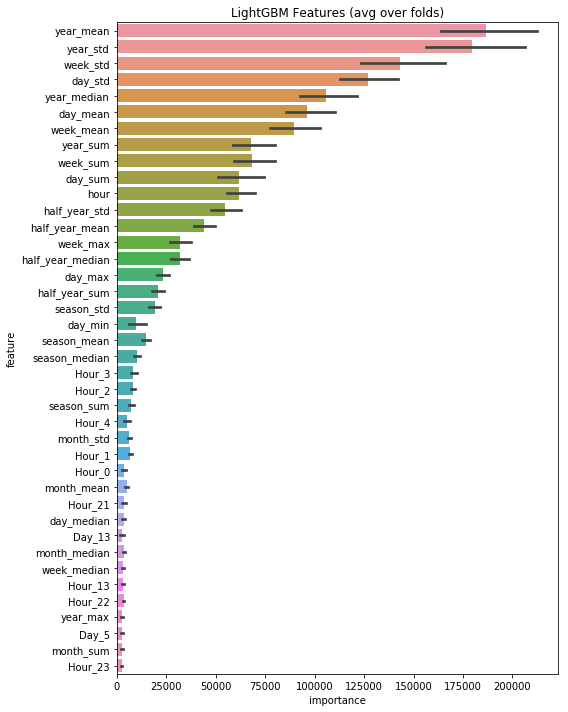

In [11]:
B_feature_importance, B_test_pred = kfold_lightgbm(x_B_train, x_B_test, y_B_train, num_folds, city="B")

FOLD 0
Training until validation scores don't improve for 500 rounds.
[100]	train's mape: 0.179209	valid's mape: 0.181444
[200]	train's mape: 0.0879805	valid's mape: 0.0914054
[300]	train's mape: 0.0539227	valid's mape: 0.057556
[400]	train's mape: 0.0404969	valid's mape: 0.043484
[500]	train's mape: 0.0338642	valid's mape: 0.0364561
[600]	train's mape: 0.0304946	valid's mape: 0.0331622
[700]	train's mape: 0.0284903	valid's mape: 0.0312729
[800]	train's mape: 0.0272347	valid's mape: 0.03015
[900]	train's mape: 0.0262217	valid's mape: 0.0293032
[1000]	train's mape: 0.0255346	valid's mape: 0.0287367
[1100]	train's mape: 0.0249519	valid's mape: 0.0282659
[1200]	train's mape: 0.0244952	valid's mape: 0.0279091
[1300]	train's mape: 0.0241165	valid's mape: 0.0276278
[1400]	train's mape: 0.0238231	valid's mape: 0.0274216
[1500]	train's mape: 0.0235531	valid's mape: 0.027223
[1600]	train's mape: 0.0233351	valid's mape: 0.0270708
[1700]	train's mape: 0.0231085	valid's mape: 0.0269201
[1800]	trai

[14900]	train's mape: 0.0181772	valid's mape: 0.0249916
[15000]	train's mape: 0.0181665	valid's mape: 0.0249886
[15100]	train's mape: 0.0181594	valid's mape: 0.0249876
[15200]	train's mape: 0.0181509	valid's mape: 0.0249843
[15300]	train's mape: 0.0181432	valid's mape: 0.0249831
[15400]	train's mape: 0.0181357	valid's mape: 0.0249812
[15500]	train's mape: 0.0181277	valid's mape: 0.0249803
[15600]	train's mape: 0.0181203	valid's mape: 0.0249801
[15700]	train's mape: 0.0181111	valid's mape: 0.0249794
[15800]	train's mape: 0.0181033	valid's mape: 0.0249783
[15900]	train's mape: 0.0180955	valid's mape: 0.024977
[16000]	train's mape: 0.0180882	valid's mape: 0.0249749
[16100]	train's mape: 0.0180814	valid's mape: 0.024972
[16200]	train's mape: 0.0180732	valid's mape: 0.024969
[16300]	train's mape: 0.0180652	valid's mape: 0.0249679
[16400]	train's mape: 0.0180488	valid's mape: 0.0249639
[16500]	train's mape: 0.0180411	valid's mape: 0.0249597
[16600]	train's mape: 0.0180355	valid's mape: 0.024

[4600]	train's mape: 0.0196775	valid's mape: 0.025977
[4700]	train's mape: 0.0196268	valid's mape: 0.0259642
[4800]	train's mape: 0.0195906	valid's mape: 0.0259552
[4900]	train's mape: 0.0195483	valid's mape: 0.0259497
[5000]	train's mape: 0.0195075	valid's mape: 0.0259362
[5100]	train's mape: 0.0194583	valid's mape: 0.0259297
[5200]	train's mape: 0.0194185	valid's mape: 0.0259247
[5300]	train's mape: 0.0193888	valid's mape: 0.025918
[5400]	train's mape: 0.0193556	valid's mape: 0.0259108
[5500]	train's mape: 0.0193109	valid's mape: 0.025904
[5600]	train's mape: 0.0192818	valid's mape: 0.025896
[5700]	train's mape: 0.0192499	valid's mape: 0.0258907
[5800]	train's mape: 0.0192166	valid's mape: 0.0258825
[5900]	train's mape: 0.019189	valid's mape: 0.0258751
[6000]	train's mape: 0.0191565	valid's mape: 0.0258665
[6100]	train's mape: 0.0191234	valid's mape: 0.0258621
[6200]	train's mape: 0.0190833	valid's mape: 0.0258542
[6300]	train's mape: 0.0190538	valid's mape: 0.0258483
[6400]	train's 

[19400]	train's mape: 0.017435	valid's mape: 0.0254463
[19500]	train's mape: 0.01743	valid's mape: 0.0254468
[19600]	train's mape: 0.0174261	valid's mape: 0.0254468
[19700]	train's mape: 0.0174222	valid's mape: 0.0254473
[19800]	train's mape: 0.017417	valid's mape: 0.0254461
[19900]	train's mape: 0.0174116	valid's mape: 0.0254436
[20000]	train's mape: 0.0174042	valid's mape: 0.0254408
[20100]	train's mape: 0.0173997	valid's mape: 0.0254398
[20200]	train's mape: 0.0173947	valid's mape: 0.0254384
[20300]	train's mape: 0.0173905	valid's mape: 0.0254374
[20400]	train's mape: 0.0173857	valid's mape: 0.0254369
[20500]	train's mape: 0.0173798	valid's mape: 0.0254355
[20600]	train's mape: 0.0173762	valid's mape: 0.0254344
[20700]	train's mape: 0.0173693	valid's mape: 0.0254322
[20800]	train's mape: 0.0173623	valid's mape: 0.0254296
[20900]	train's mape: 0.0173552	valid's mape: 0.0254254
[21000]	train's mape: 0.0173472	valid's mape: 0.0254222
[21100]	train's mape: 0.0173419	valid's mape: 0.0254

[34100]	train's mape: 0.0168788	valid's mape: 0.025321
[34200]	train's mape: 0.0168751	valid's mape: 0.0253188
[34300]	train's mape: 0.0168724	valid's mape: 0.0253181
[34400]	train's mape: 0.016871	valid's mape: 0.0253182
[34500]	train's mape: 0.0168687	valid's mape: 0.0253182
[34600]	train's mape: 0.0168665	valid's mape: 0.0253184
[34700]	train's mape: 0.0168639	valid's mape: 0.0253182
[34800]	train's mape: 0.0168595	valid's mape: 0.0253154
[34900]	train's mape: 0.0168561	valid's mape: 0.0253133
[35000]	train's mape: 0.016852	valid's mape: 0.0253132
[35100]	train's mape: 0.0168494	valid's mape: 0.0253126
[35200]	train's mape: 0.0168478	valid's mape: 0.0253129
[35300]	train's mape: 0.016845	valid's mape: 0.0253128
[35400]	train's mape: 0.0168426	valid's mape: 0.0253125
[35500]	train's mape: 0.0168396	valid's mape: 0.0253119
[35600]	train's mape: 0.0168375	valid's mape: 0.025311
[35700]	train's mape: 0.0168352	valid's mape: 0.0253106
[35800]	train's mape: 0.0168335	valid's mape: 0.02531

[12000]	train's mape: 0.018015	valid's mape: 0.0268179
[12100]	train's mape: 0.0180008	valid's mape: 0.0268117
[12200]	train's mape: 0.0179917	valid's mape: 0.02681
[12300]	train's mape: 0.0179826	valid's mape: 0.0268094
[12400]	train's mape: 0.0179697	valid's mape: 0.0268057
[12500]	train's mape: 0.0179589	valid's mape: 0.0268029
[12600]	train's mape: 0.0179493	valid's mape: 0.0268013
[12700]	train's mape: 0.0179389	valid's mape: 0.0267983
[12800]	train's mape: 0.0179299	valid's mape: 0.0267963
[12900]	train's mape: 0.0179167	valid's mape: 0.0267935
[13000]	train's mape: 0.0179052	valid's mape: 0.0267888
[13100]	train's mape: 0.0178908	valid's mape: 0.026787
[13200]	train's mape: 0.017879	valid's mape: 0.0267854
[13300]	train's mape: 0.0178686	valid's mape: 0.0267845
[13400]	train's mape: 0.0178572	valid's mape: 0.026782
[13500]	train's mape: 0.0178476	valid's mape: 0.0267796
[13600]	train's mape: 0.0178388	valid's mape: 0.0267787
[13700]	train's mape: 0.0178304	valid's mape: 0.026778

[26800]	train's mape: 0.0170092	valid's mape: 0.0265896
[26900]	train's mape: 0.0170069	valid's mape: 0.0265893
[27000]	train's mape: 0.0170042	valid's mape: 0.0265892
[27100]	train's mape: 0.017001	valid's mape: 0.0265884
[27200]	train's mape: 0.0169982	valid's mape: 0.0265876
[27300]	train's mape: 0.0169943	valid's mape: 0.0265868
[27400]	train's mape: 0.0169909	valid's mape: 0.0265857
[27500]	train's mape: 0.0169877	valid's mape: 0.0265855
[27600]	train's mape: 0.0169845	valid's mape: 0.0265839
[27700]	train's mape: 0.0169802	valid's mape: 0.0265839
[27800]	train's mape: 0.0169772	valid's mape: 0.0265828
[27900]	train's mape: 0.016975	valid's mape: 0.0265828
[28000]	train's mape: 0.0169716	valid's mape: 0.0265801
[28100]	train's mape: 0.0169686	valid's mape: 0.0265792
[28200]	train's mape: 0.0169644	valid's mape: 0.0265772
[28300]	train's mape: 0.0169606	valid's mape: 0.0265762
[28400]	train's mape: 0.0169581	valid's mape: 0.0265756
[28500]	train's mape: 0.0169548	valid's mape: 0.02

[41600]	train's mape: 0.0165888	valid's mape: 0.0264552
[41700]	train's mape: 0.0165871	valid's mape: 0.0264543
[41800]	train's mape: 0.0165844	valid's mape: 0.026453
[41900]	train's mape: 0.0165822	valid's mape: 0.0264528
[42000]	train's mape: 0.0165802	valid's mape: 0.0264527
[42100]	train's mape: 0.0165784	valid's mape: 0.0264527
[42200]	train's mape: 0.016576	valid's mape: 0.0264516
[42300]	train's mape: 0.0165735	valid's mape: 0.0264512
[42400]	train's mape: 0.016572	valid's mape: 0.0264508
[42500]	train's mape: 0.0165701	valid's mape: 0.0264516
[42600]	train's mape: 0.0165682	valid's mape: 0.0264512
[42700]	train's mape: 0.0165663	valid's mape: 0.026451
[42800]	train's mape: 0.0165646	valid's mape: 0.0264504
[42900]	train's mape: 0.0165626	valid's mape: 0.0264494
[43000]	train's mape: 0.0165593	valid's mape: 0.0264474
[43100]	train's mape: 0.0165579	valid's mape: 0.0264479
[43200]	train's mape: 0.0165561	valid's mape: 0.026448
[43300]	train's mape: 0.0165543	valid's mape: 0.02644

[12800]	train's mape: 0.0183047	valid's mape: 0.0254313
[12900]	train's mape: 0.018294	valid's mape: 0.0254272
[13000]	train's mape: 0.0182837	valid's mape: 0.0254199
[13100]	train's mape: 0.0182739	valid's mape: 0.0254132
[13200]	train's mape: 0.0182596	valid's mape: 0.0254042
[13300]	train's mape: 0.0182491	valid's mape: 0.0253988
[13400]	train's mape: 0.0182402	valid's mape: 0.0253968
[13500]	train's mape: 0.0182285	valid's mape: 0.0253951
[13600]	train's mape: 0.0182202	valid's mape: 0.025391
[13700]	train's mape: 0.0182088	valid's mape: 0.0253849
[13800]	train's mape: 0.0182018	valid's mape: 0.0253829
[13900]	train's mape: 0.0181927	valid's mape: 0.0253768
[14000]	train's mape: 0.0181823	valid's mape: 0.0253753
[14100]	train's mape: 0.0181746	valid's mape: 0.025375
[14200]	train's mape: 0.0181655	valid's mape: 0.0253747
[14300]	train's mape: 0.0181554	valid's mape: 0.0253755
[14400]	train's mape: 0.0181468	valid's mape: 0.0253745
[14500]	train's mape: 0.0181388	valid's mape: 0.025

[27500]	train's mape: 0.0174439	valid's mape: 0.0251433
[27600]	train's mape: 0.0174409	valid's mape: 0.0251424
[27700]	train's mape: 0.0174375	valid's mape: 0.0251406
[27800]	train's mape: 0.0174345	valid's mape: 0.0251389
[27900]	train's mape: 0.0174317	valid's mape: 0.0251375
[28000]	train's mape: 0.0174292	valid's mape: 0.0251372
[28100]	train's mape: 0.0174267	valid's mape: 0.0251363
[28200]	train's mape: 0.017424	valid's mape: 0.0251351
[28300]	train's mape: 0.0174208	valid's mape: 0.0251334
[28400]	train's mape: 0.0174173	valid's mape: 0.0251309
[28500]	train's mape: 0.0174143	valid's mape: 0.0251294
[28600]	train's mape: 0.0174111	valid's mape: 0.0251288
[28700]	train's mape: 0.0174083	valid's mape: 0.0251273
[28800]	train's mape: 0.0174047	valid's mape: 0.0251258
[28900]	train's mape: 0.017401	valid's mape: 0.0251247
[29000]	train's mape: 0.0173966	valid's mape: 0.0251222
[29100]	train's mape: 0.017394	valid's mape: 0.0251217
[29200]	train's mape: 0.0173918	valid's mape: 0.025

[9600]	train's mape: 0.0186261	valid's mape: 0.0262224
[9700]	train's mape: 0.0186122	valid's mape: 0.0262198
[9800]	train's mape: 0.0185972	valid's mape: 0.026217
[9900]	train's mape: 0.018582	valid's mape: 0.0262163
[10000]	train's mape: 0.0185694	valid's mape: 0.0262122
[10100]	train's mape: 0.0185558	valid's mape: 0.0262083
[10200]	train's mape: 0.0185448	valid's mape: 0.0262062
[10300]	train's mape: 0.018534	valid's mape: 0.0262036
[10400]	train's mape: 0.0185171	valid's mape: 0.0262014
[10500]	train's mape: 0.0185057	valid's mape: 0.0262008
[10600]	train's mape: 0.018493	valid's mape: 0.0261975
[10700]	train's mape: 0.0184816	valid's mape: 0.0261962
[10800]	train's mape: 0.0184718	valid's mape: 0.0261949
[10900]	train's mape: 0.0184588	valid's mape: 0.0261905
[11000]	train's mape: 0.0184427	valid's mape: 0.0261875
[11100]	train's mape: 0.018431	valid's mape: 0.0261823
[11200]	train's mape: 0.0184188	valid's mape: 0.0261796
[11300]	train's mape: 0.0184073	valid's mape: 0.026175
[1

[24300]	train's mape: 0.0173817	valid's mape: 0.0258766
[24400]	train's mape: 0.0173777	valid's mape: 0.0258756
[24500]	train's mape: 0.0173719	valid's mape: 0.0258742
[24600]	train's mape: 0.0173651	valid's mape: 0.025871
[24700]	train's mape: 0.0173612	valid's mape: 0.0258692
[24800]	train's mape: 0.0173563	valid's mape: 0.0258698
[24900]	train's mape: 0.0173504	valid's mape: 0.0258689
[25000]	train's mape: 0.0173446	valid's mape: 0.0258683
[25100]	train's mape: 0.017339	valid's mape: 0.0258665
[25200]	train's mape: 0.0173329	valid's mape: 0.025866
[25300]	train's mape: 0.0173279	valid's mape: 0.0258654
[25400]	train's mape: 0.0173248	valid's mape: 0.0258652
[25500]	train's mape: 0.0173214	valid's mape: 0.0258652
[25600]	train's mape: 0.0173157	valid's mape: 0.0258652
[25700]	train's mape: 0.0173117	valid's mape: 0.0258641
[25800]	train's mape: 0.0173076	valid's mape: 0.0258632
[25900]	train's mape: 0.0173046	valid's mape: 0.0258631
[26000]	train's mape: 0.0172997	valid's mape: 0.025

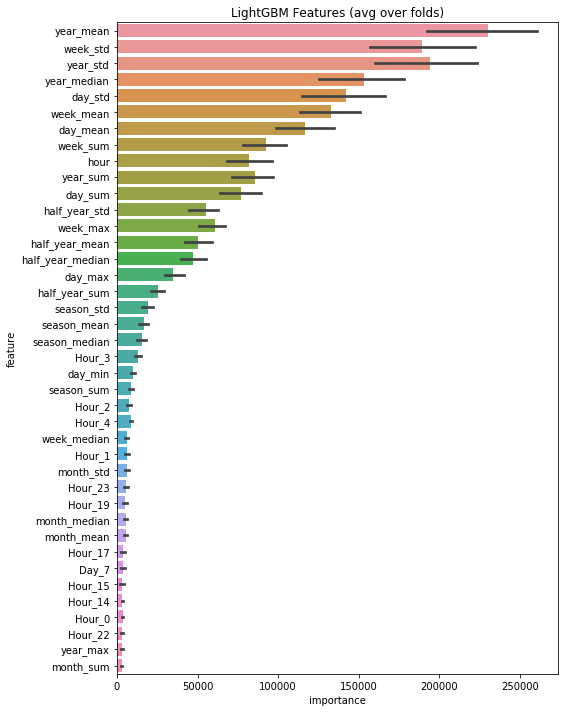

In [12]:
C_feature_importance, C_test_pred = kfold_lightgbm(x_C_train, x_C_test, y_C_train, num_folds, city="C")

In [13]:
A_mape = mean_absolute_percentage_error(y_A_test, A_test_pred)
B_mape = mean_absolute_percentage_error(y_B_test, B_test_pred)
C_mape = mean_absolute_percentage_error(y_C_test, C_test_pred)
print("Test MAPE\nA: %f, B: %f, C: %f"%(A_mape, B_mape, C_mape))

Test MAPE
A: 15.267763, B: 20.578312, C: 12.654977


### 构建预测集

In [14]:
predict = pd.DataFrame()
date = pd.date_range(start='2018-11-16 00:00:00', end='2019-2-18 23:00:00', freq='H')
date_list = [pd.Timestamp(x).strftime("%Y-%m-%d %H:%M:%S") for x in date.values]
predict["Time"] = date_list

predict = getch_date(predict)

label = preprocessing.LabelEncoder()
one_hot = preprocessing.OneHotEncoder(sparse = False, categories='auto')
# Year = one_hot.fit_transform(np.array(predict.Year).reshape(-1, 1))
Month = one_hot.fit_transform(np.array(predict.Month).reshape(-1, 1))
Day = one_hot.fit_transform(np.array(predict.Day).reshape(-1, 1))
Hour = one_hot.fit_transform(np.array(predict.Hour).reshape(-1, 1))

# one_hot_processing(Year, predict, "Year")
one_hot_processing(Month, predict, "Month")
one_hot_processing(Day, predict, "Day")
one_hot_processing(Hour, predict, "Hour")

predict = predict.drop(["Time", "Month", "Day", "Hour"], axis=1)
predict["hour"] = np.zeros(predict.shape[0])
predict["day_mean"] = np.zeros(predict.shape[0])
predict["week_mean"] = np.zeros(predict.shape[0])
predict["month_mean"] = np.zeros(predict.shape[0])
predict["season_mean"] = np.zeros(predict.shape[0])
predict["half_year_mean"] = np.zeros(predict.shape[0])
predict["year_mean"] = np.zeros(predict.shape[0])
predict["day_max"] = np.zeros(predict.shape[0])
predict["week_max"] = np.zeros(predict.shape[0])
predict["month_max"] = np.zeros(predict.shape[0])
predict["season_max"] = np.zeros(predict.shape[0])
predict["half_year_max"] = np.zeros(predict.shape[0])
predict["year_max"] = np.zeros(predict.shape[0])
predict["day_min"] = np.zeros(predict.shape[0])
predict["week_min"] = np.zeros(predict.shape[0])
predict["month_min"] = np.zeros(predict.shape[0])
predict["season_min"] = np.zeros(predict.shape[0])
predict["half_year_min"] = np.zeros(predict.shape[0])
predict["year_min"] = np.zeros(predict.shape[0])
predict["day_std"] = np.zeros(predict.shape[0])
predict["week_std"] = np.zeros(predict.shape[0])
predict["month_std"] = np.zeros(predict.shape[0])
predict["season_std"] = np.zeros(predict.shape[0])
predict["half_year_std"] = np.zeros(predict.shape[0])
predict["year_std"] = np.zeros(predict.shape[0])
predict["day_median"] = np.zeros(predict.shape[0])
predict["week_median"] = np.zeros(predict.shape[0])
predict["month_median"] = np.zeros(predict.shape[0])
predict["season_median"] = np.zeros(predict.shape[0])
predict["half_year_median"] = np.zeros(predict.shape[0])
predict["year_median"] = np.zeros(predict.shape[0])
predict["day_sum"] = np.zeros(predict.shape[0])
predict["week_sum"] = np.zeros(predict.shape[0])
predict["month_sum"] = np.zeros(predict.shape[0])
predict["season_sum"] = np.zeros(predict.shape[0])
predict["half_year_sum"] = np.zeros(predict.shape[0])
predict["year_sum"] = np.zeros(predict.shape[0])

predict

,Month_0,Month_1,Month_2,Month_3,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,...,month_median,season_median,half_year_median,year_median,day_sum,week_sum,month_sum,season_sum,half_year_sum,year_sum
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 循环预测，预测输出5个模型的结果的均值

In [15]:
A_pred = pd.DataFrame()
B_pred = pd.DataFrame()
C_pred = pd.DataFrame()
A_pred["traffic"] = np.zeros(predict.shape[0])
B_pred["traffic"] = np.zeros(predict.shape[0])
C_pred["traffic"] = np.zeros(predict.shape[0])

def traffic_pred(raw_A_data, A_pred, city):
    print("Predicting city %s..." % city)
     
    year_temp = raw_A_data["traffic"][-24 * 7 * 30 * 12:].tolist()
    half_year_temp = raw_A_data["traffic"][-24 * 7 * 30 * 6:].tolist()
    season_temp = raw_A_data["traffic"][-24 * 7 * 30 * 3:].tolist()
    month_temp = raw_A_data["traffic"][-24 * 7 * 30:].tolist()
    week_temp = raw_A_data["traffic"][-24 * 7:].tolist()
    day_temp = raw_A_data["traffic"][-24:].tolist()
    hour_temp = raw_A_data["traffic"][-1:].tolist()

    for i in range(0, len(predict)):
        
        predict["hour"][i] = hour_temp[0]
        predict["day_mean"][i] = np.mean(day_temp)
        predict["week_mean"][i] = np.mean(week_temp)
        predict["month_mean"][i] = np.mean(month_temp)
        predict["season_mean"][i] = np.mean(season_temp)
        predict["half_year_mean"][i] = np.mean(half_year_temp)
        predict["year_mean"][i] = np.mean(year_temp)

        predict["day_max"][i] = np.max(day_temp)
        predict["week_max"][i] = np.max(week_temp)
        predict["month_max"][i] = np.max(month_temp)
        predict["season_max"][i] = np.max(season_temp)
        predict["half_year_max"][i] = np.max(half_year_temp)
        predict["year_max"][i] = np.max(year_temp)

        predict["day_min"][i] = np.min(day_temp)
        predict["week_min"][i] = np.min(week_temp)
        predict["month_min"][i] = np.min(month_temp)
        predict["season_min"][i] = np.min(season_temp)
        predict["half_year_min"][i] = np.min(half_year_temp)
        predict["year_min"][i] = np.min(year_temp)

        predict["day_std"][i] = np.std(day_temp)
        predict["week_std"][i] = np.std(week_temp)
        predict["month_std"][i] = np.std(month_temp)
        predict["season_std"][i] = np.std(season_temp)
        predict["half_year_std"][i] = np.std(half_year_temp)
        predict["year_std"][i] = np.std(year_temp)

        predict["day_median"][i] = np.median(day_temp)
        predict["week_median"][i] = np.median(week_temp)
        predict["month_median"][i] = np.median(month_temp)
        predict["season_median"][i] = np.median(season_temp)
        predict["half_year_median"][i] = np.median(half_year_temp)
        predict["year_median"][i] = np.median(year_temp)

        predict["day_sum"][i] = np.sum(day_temp)
        predict["week_sum"][i] = np.sum(week_temp)
        predict["month_sum"][i] = np.sum(month_temp)
        predict["season_sum"][i] = np.sum(season_temp)
        predict["half_year_sum"][i] = np.sum(half_year_temp)
        predict["year_sum"][i] = np.sum(year_temp)
        
        models = os.listdir("../model")
        pred_list = []
        for model in models:
            if city in model:
                filename = "../model/" + model
                clf = lgb.Booster(model_file=filename)
                pred_list.append(clf.predict(predict[predict.index == i], num_iteration=clf.best_iteration))
        A_pred["traffic"][i] = np.mean(pred_list)
        
        print("Index ", i, ", pred", A_pred["traffic"][i])
        
        hour_temp.pop()
        day_temp.pop()
        week_temp.pop()
        month_temp.pop()
        season_temp.pop()
        half_year_temp.pop()
        year_temp.pop()
        
        year_temp.append(A_pred.traffic[i])
        half_year_temp.append(A_pred.traffic[i])
        season_temp.append(A_pred.traffic[i])
        month_temp.append(A_pred.traffic[i])
        week_temp.append(A_pred.traffic[i])
        day_temp.append(A_pred.traffic[i])
        hour_temp.append(A_pred.traffic[i])
        
    return A_pred

A_pred = traffic_pred(raw_A_data, A_pred, city="A")
B_pred = traffic_pred(raw_B_data, B_pred, city="B")
C_pred = traffic_pred(raw_C_data, C_pred, city="C")

A_pred

Predicting city A...
Index  0 , pred 1.3266473558805025
Index  1 , pred 1.329207892303165
Index  2 , pred 1.3306522625689623
Index  3 , pred 1.3309463968182176
Index  4 , pred 1.3318468038116293
Index  5 , pred 1.3294761966609059
Index  6 , pred 1.330960401092779
Index  7 , pred 1.3335307578935462
Index  8 , pred 1.2386395038729021
Index  9 , pred 1.2057768065741252
Index  10 , pred 1.1092549910093858


KeyboardInterrupt: 

### 输出结果

In [ ]:
output = pd.DataFrame()
date = pd.date_range(start='2018-11-16 00:00:00', end='2019-2-18 23:00:00', freq='H')
date_list = [pd.Timestamp(x).strftime("%Y-%m-%d %H:%M:%S") for x in date.values]
output["时间"] = date_list

output_A = output_B = output_C = output
list_A = []
list_B = []
list_C = []
for i in range(len(output_A)):
    list_A.append("A")
    list_B.append("B")
    list_C.append("C")
    
output_A["地市"] = list_A
output_A["流量"] = A_pred
output_B["地市"] = list_B
output_B["流量"] = B_pred
output_C["地市"] = list_C
output_C["流量"] = C_pred

In [ ]:
output_A.to_csv('../data/output_A.csv')
output_B.to_csv('../data/output_B.csv')
output_C.to_csv('../data/output_C.csv')